# Manipulación de Arrays con Numpy

### Arrays en Numpy

A diferencia de las listas de Python, cuando creamos un array en Numpy, existe la restricción de que todos los elementos tienen que ser del mismo tipo.
Esto hace que los arrays de numpy sean **más eficientes**.


In [1]:
import numpy as np

In [2]:
# lista de python
l = [1, 4, 2, 5, 3]

# arreglo de enteros instanciado a partir de una lista:
np.array(l)

array([1, 4, 2, 5, 3])

In [3]:
# instanciamos un array a partir de una lista literal
a = np.array([1, 4, 2, 5, 3])

# atributo que indica el tipo de datos de los elementos del array
a.dtype

dtype('int64')

In [4]:
# Si la lista de python tiene integers y floats, 
# el array de Numpy transforma todo en float para tener un solo tipo.
py_list = [3.14, 4, 2, 3]
np.array(py_list)

array([ 3.14,  4.  ,  2.  ,  3.  ])

In [5]:
np.array(py_list).dtype

dtype('float64')



Para crear arrays desde cero, lo más eficiente es hacerlo con los métodos propios de Numpy. Puedo crear arrays de ceros, de unos, de una secuencia, de valores aleatorios o de valores con una cierta **distribución estadística**, como por ejemplo la distribución normal.

##### Crear una Array de ceros

In [8]:
# Crear un array de longitud 10 lleno con ceros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Inicializar un array vacío

In [12]:
# Aloca un espacio en memoria pero no la incializa
my_array = np.empty([2, 2])
my_array

array([[ 0.,  0.],
       [ 0.,  0.]])

#### Crear un Array que contiene números con distribución normal

In [13]:
# Puedo incializar un array de números con distribución normal
# El primer parámetro es la media de la distribución
# El segundo parámetro es el desvío estándar
norm = np.random.normal(0, 1, 12)

In [16]:
norm

array([-0.24424857, -0.16494493, -0.2426744 ,  1.54640269, -0.98078879,
        0.21280538, -0.12394975,  0.86104089, -0.56687083, -0.00720825,
        0.22339583,  0.06385587])

In [18]:
# También podemos crear una distribución normal 
# y asignarla a una matriz de dimensión n x m 
norm = np.random.normal(0, 1, (3,4))
norm

array([[-0.88756693,  0.96162608, -0.30740418,  0.26608259],
       [ 0.33600322,  0.76105229,  1.03029949, -0.16448668],
       [ 0.67442377,  0.36726263,  0.5718629 , -0.34244178]])

In [21]:
# Opcionalmente, puedo utilizar set seed para que la función random de siempre
# los mismos resultados
np.random.seed(0)  

norm = np.random.normal(0, 1, (3,4))
norm

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351]])


### Atributos de un array


In [22]:
# Array de 3 dimensiones con valores aleatorios entre 0 y 9
x3 = np.random.randint(10, size=(3, 4, 5))  

In [23]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("dtype:", x3.dtype)

# Es el tamaño de cada elemento del array. Depende del tipo de datos. 
print("itemsize:", x3.itemsize, "bytes") 

# Es el tamaño de todo el array. Se calcula itemsize * size
print("nbytes:", x3.nbytes, "bytes") 

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
dtype: int64
itemsize: 8 bytes
nbytes: 480 bytes


### Array slicing (Selección de elementos)

#### Slicing sobre una dimensión

El slicing es similar al de las listas de python [start:stop:step]. El índice stop no se incluye pero el start sí se incluye. Por ejemplo [1:3] incluye al índice 1 pero no al 3.
Funciona como un intervalo semicerrado [1,3).


In [24]:
# Sobre un array de una dimension
one_d_array = np.arange(10)
one_d_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
# Start = 1:  empezamos por el segundo elemento
# Stop: No está definido, entonces llegamos hasta el final.
# Step: El paso o distacia entre los elementos que voy a tomar.
one_d_array[1::2]  

array([1, 3, 5, 7, 9])

In [26]:
# Para invertir el orden del array, podemos usar Step = -1
one_d_array[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [27]:
# Para seleccionar una parte de los elementos pero invertida, 
# invertimos los índices de corte

one_d_array[7:4:-1]  

array([7, 6, 5])

Con la misma lógica, se puede seleccionar en dos dimensiones

In [28]:
np.random.seed(0)
two_d_array = np.random.randint(10, size=(3, 4))
two_d_array

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

#### Slicing sobre arrays de más  dimensiones

Cuando tenemos más de una dimensión, podemos hacer slicing sobre cada una de ellas separándolas con una coma. 


In [29]:
# Acceder a una columna
# En este ejemplo los : indican que accedemos a todos los elementos de cada fila y el cero después de la coma
# indica que solamente lo hacemos para la columna "0" (la primera).
two_d_array[:, 0]

array([5, 7, 2])

In [30]:
# Acceder a una fila
two_d_array[2, :]

array([2, 4, 7, 6])

In [31]:
# Otra forma de acceder a una fila
two_d_array[2]

array([2, 4, 7, 6])

In [32]:
# Un slice de dos columnas
two_d_array[:, 1:3]

array([[0, 3],
       [9, 3],
       [4, 7]])

In [33]:
# Todas las columnas listadas en orden inverso
two_d_array[:, ::-1]

array([[3, 3, 0, 5],
       [5, 3, 9, 7],
       [6, 7, 4, 2]])

### Reshaping de arrays (Cambiar la dimensionalidad)

In [ ]:
grid = np.arange(1, 10).reshape((3, 3))
grid

### Concatenar y separar Arrays 


In [36]:
# Concatenate une los elementos de los dos arrays en un array nuevo.

x = np.array([1, 2, 3])
y = np.array([7, 8, 9])
np.concatenate([x, y])

array([1, 2, 3, 7, 8, 9])

In [37]:
grid1 = np.array([[1, 2, 3],
                  [4, 5, 6]])

grid2 = np.array([[10,11],
                  [12,13]])

In [40]:
# Cuando el array es de dos dimensiones podemos 
# concatenarlos siguiendo el eje de las columnas
np.concatenate([grid1, grid2], axis=1)

array([[ 1,  2,  3, 10, 11],
       [ 4,  5,  6, 12, 13]])

In [41]:
# También podemos concatenar en el eje de las filas con axis = 0
# Nota: revisar las dimensiones de los arrays (misma cantidad de columnas)

grid1 = np.array([[1, 2],
                  [4, 5]])

grid2 = np.array([[10,11],
                  [12,13]])

np.concatenate([grid1, grid2], axis=0)

array([[ 1,  2],
       [ 4,  5],
       [10, 11],
       [12, 13]])

In [ ]:
x = [1, 2, 3, 99, 99, 3, 2, 1, 7]

# El método np.split() toma una lista con los índices donde se establecen los cortes.
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

## Numpy Universal Functions

Una de las ventajas de usar Numpy es que permite aplicar **operaciones vectorizadas**. 

Cuando determinadas operaciones se aplican sobre todos los elementos de un array, esta tarea se puede paralelizar y la computadora la completa en un tiempo mucho menor que si aplicásemos un loop y operásemos sobre cada uno de los elementos.

Para esto sirven las UFuncs (Universal Functions) de Numpy


##### Ejemplo: calcular el recíproco (1/x) de cada elemento de un array

In [42]:
# Definimos un array de gran tamaño
big_array = np.random.randint(1, 100, size=1000000)

# Enfoque tradicional

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

%timeit compute_reciprocals(big_array)

1 loop, best of 3: 2.05 s per loop


In [46]:
# Enfoque Numpy
(1.0 / big_array)

%timeit (1.0 / big_array)

100 loops, best of 3: 3.81 ms per loop


## Agregación, Max y Min con Numpy

Con numpy se pueden hacer de forma más eficiente los métodos que trabajan sobre los elementos del array:

In [ ]:
big_array = np.random.rand(100000)

%timeit sum(big_array)
%timeit np.sum(big_array)

#### En arrays de varias dimensiones

In [48]:
M = np.random.random((3, 4))
print(M)

[[ 0.33651066  0.12437185  0.12815737  0.69973137]
 [ 0.94822856  0.70585987  0.55842769  0.886285  ]
 [ 0.82401548  0.07406037  0.92034743  0.90918001]]


In [49]:
# En Numpy, cuando se ejecutan funciones que reducen la dimensionalidad, axis representa el eje que se va a reducir
# En una matriz de dos dimensiones el 0 representa 
# el eje de las filas, y el 1 el eje de las columnas

print("Suma de toda la matriz: ", M.sum())
print("Mínimos de cada columna: ", M.min(axis=0))
print("Máximo de cada fila: ", M.max(axis=1))
print("Suma de cada fila: ", M.sum(axis=1))

Suma de toda la matriz:  7.1151756498
Mínimos de cada columna:  [ 0.33651066  0.07406037  0.12815737  0.69973137]
Máximo de cada fila:  [ 0.69973137  0.94822856  0.92034743]
Suma de cada fila:  [ 1.28877125  3.09880111  2.72760328]


#### Ejemplo de aplicación

In [53]:
# Vamos a usar la librería Pandas únicamente para importar un csv 
import pandas as pd

# Modificamos el path para acceder al archivo con los datos
data = pd.read_csv('Data/president_heights.csv')
print(data.head(3))

# Indexamos un dataframe de pandas para extraer una columna.
# Nota: Más adelante estudiaremos los dataframes de Pandas en detalle 
c = data['height(cm)']

# Veamos los primeros valores de la columna (tipo Series en Pandas)
print (type(c))
c.head(10)

   order               name  height(cm)
0      1  George Washington         189
1      2         John Adams         170
2      3   Thomas Jefferson         189
<class 'pandas.core.series.Series'>


0    189
1    170
2    189
3    163
4    183
5    171
6    185
7    168
8    173
9    183
Name: height(cm), dtype: int64

In [54]:
# Instanciamos un array de Numpy a partir de la columna anterior
heights = np.array(c)

# Imprimimos los valores ordenados
print(np.sort(heights))

[163 168 168 170 170 171 173 173 173 173 174 175 175 177 178 178 178 178
 179 180 182 182 182 182 183 183 183 183 183 183 183 183 185 185 185 188
 188 188 189 189 193 193]


In [55]:
# Percentiles
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


In [59]:
# Importamos las librerías de visualización
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

# Configuramos parámetros estéticos por defecto
seaborn.set()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


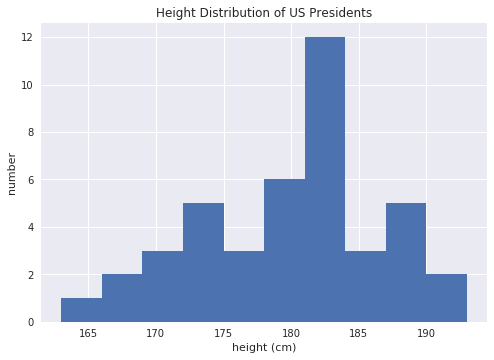

In [60]:
# Tipo de visualización
plt.hist(heights)

# Títulos
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')

# Mostramos el histograma
plt.show()

## Broadcasting: Otra forma de vectorizar

En conjunto con las ufuncs, el broadcasting es una forma de aplicar operaciones sobre los datos sin tener que escribir loops "for" en Python nativo que resultan más lentos.

Recordemos que cuando operamos sobre arrays de las mismas dimensiones, se puede hacer operaciones eficientes elemento a elemento.



In [61]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

En el ejemplo de arriba, "a + b" es una operación eficiente porque "a" y "b" tienen la misma dimensionalidad y tamaño. 
Las reglas de "broadcasting" de Numpy, permiten que la operación siga siendo eficiente llevando los elementos involucrados a la misma dimensión y tamaño.

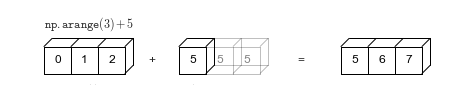

In [62]:
a + 5

array([5, 6, 7])

Veamos un ejemplo con otras dimensiones:

In [63]:
#Recordemos el valor de "a"
a

array([0, 1, 2])

In [64]:
# Ahora queremos sumar el vector "a" con una matriz de dos dimensiones, de tamaño 3x3 que contiene unos.
M = np.ones((3, 3))
M

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

Gráficamente, esto es lo que sucedió:
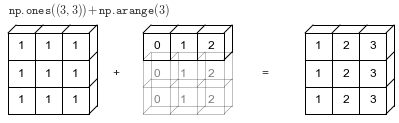

In [65]:
M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

## Comparaciones y Máscaras Booleanas

**Agregar la tabla con los operadores.**


In [67]:
import numpy as np
import pandas as pd

# Usamos pandas para extraer los datos como un array de Numpy
rainfall = pd.read_csv('Data/Seattle2014.csv')['PRCP'].values
print ("shape:", rainfall.shape)

print (rainfall)

shape: (365,)
[  0  41  15   0   0   3 122  97  58  43 213  15   0   0   0   0   0   0
   0   0   0   5   0   0   0   0   0  89 216   0  23  20   0   0   0   0
   0   0  51   5 183 170  46  18  94 117 264 145 152  10  30  28  25  61
 130   3   0   0   0   5 191 107 165 467  30   0 323  43 188   0   0   5
  69  81 277   3   0   5   0   0   0   0   0  41  36   3 221 140   0   0
   0   0  25   0  46   0   0  46   0   0   0   0   0   0   5 109 185   0
 137   0  51 142  89 124   0  33  69   0   0   0   0   0 333 160  51   0
   0 137  20   5   0   0   0   0   0   0   0   0   0   0   0   0  38   0
  56   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  18  64   0   5  36  13   0   8   3   0   0   0   0   0   0  18  23   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   3 193   0   0   0   0   0   0   0   0   0   5   0   0
   0   0   0   0   0   0   5 127 216   0  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  84  13 

También exploramos este array utilizando un histograma. La funcionalidad la da la librería matplotlib

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


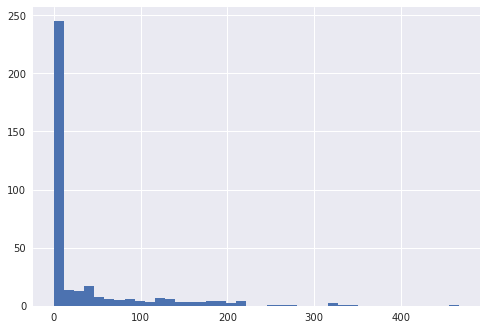

In [72]:
plt.hist(rainfall,bins = 40);

In [73]:
# Aplicamos una condición booleana sobre un array de Numpy y
# nos devuelve una nuevo array con True o False.
# Es una vectorización de la operación de comparación

print (rainfall == 0)

[ True False False  True  True False False False False False False False
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True False False  True False False  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False  True  True  True False
 False False False False False  True False False False  True  True False
 False False False False  True False  True  True  True  True  True False
 False False False False  True  True  True  True False  True False  True
  True False  True  True  True  True  True  True False False False  True
 False  True False False False False  True False False  True  True  True
  True  True False False False  True  True False False False  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False  T

**En lugar de hacer un loop** y definir un contador, vamos a describir los valores que nos interesan de este dataset utilizando Numpy:



In [74]:
# Veamos primero este comportamiento de los booleanos en python
print("Suma de numpy: ", np.sum([True,False]))
print("Suma de Python: ", True + False)

print("Operaciones sobre Booleans: ", (True & False))
print("Operaciones sobre Booleans: ", (True & True))
print("Operaciones sobre Booleans: ", (False & True))
print("Operaciones sobre Booleans: ", (False & False))

Suma de numpy:  1
Suma de Python:  1
Operaciones sobre Booleans:  False
Operaciones sobre Booleans:  True
Operaciones sobre Booleans:  False
Operaciones sobre Booleans:  False


In [75]:
print("Cantidad de días sin lluvia:      ", np.sum(rainfall == 0))
print("Cantidad de días con lluvia:      ", np.sum(rainfall != 0))
print("Cantidad de días con más de 100 cm de lluvia:", np.sum(rainfall > 100))
print("Cantidad de días con lluvia, pero no mayor a 100cm  :", np.sum((rainfall > 0) & (rainfall < 100)))

Cantidad de días sin lluvia:       215
Cantidad de días con lluvia:       150
Cantidad de días con más de 100 cm de lluvia: 47
Cantidad de días con lluvia, pero no mayor a 100cm  : 103


## Accediendo a los elementos del Array con "Fancy Indexing"


In [76]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Puedo acceder a un conjunto de elementos creando una lista con los índices que quiero acceder

In [77]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [78]:
x[x>60]

array([92, 71, 82, 86, 74, 74])

In [84]:
x > 60

array([False,  True, False,  True, False, False,  True,  True,  True,  True], dtype=bool)